# CENG474: Project 2 - Clustering

Due: 2019-12-17
Team: Abdulkerim Güven, Süha Tanrıverdi, Esin Gökçe

Use the ALS dataset. This case-study examines the patterns, symmetries, associations and causality in a rare but devastating disease, amyotrophic lateral sclerosis (ALS). A major clinically relevant question in this biomedical study is: What patient phenotypes can be automatically and reliably identified and used to predict the change of the ALSFRS slope over time?. This problem aims to explore the data set by unsupervised learning.

TODO:
* [ ] Load and prepare the data.
* [ ] Perform summary and preliminary visualization.
* [ ] Train a k-Means model on the data, select k as mentioned in [DataScience Course in UMICH](http://www.socr.umich.edu/people/dinov/2017/Spring/DSPA_HS650/notes/12_kMeans_Clustering.html).
	* k-Means için Nurdan hocanın önerdiği kaynak: [Chris Albon'un sitesi](https://chrisalbon.com/machine_learning/clustering/k-means_clustering/)
* [ ] Evaluating the model performance by report the center of clusters and silhouette and explain details (since 100 dimensions, it is messy to use bar plot show the centers).
* [ ] Tune parameters and plot with k-means++.
* [ ] Return the model with optimal parameters and interpret the clustering results.
* [ ] Apply Hierarchical Clustering on three different linkages and compare the corresponding Silhouette plots.
	* Hierarchical için Nurdan hocanın önerdiği kaynak: [Chris Albon'un sitesi](https://chrisalbon.com/machine_learning/clustering/agglomerative_clustering/)
* [ ] Apply DBSCAN on different minpoints and eps
	* DBScan için Nurdan hocanın önerdiği kaynak: [Chris Albon'un sitesi](https://chrisalbon.com/machine_learning/clustering/dbscan_clustering/)
* [ ] Compare the result of the above methods.
* Diğer kaynaklar:
	* Mean shift clustering : https://chrisalbon.com/machine_learning/clustering/meanshift_clustering/
	* Clustering validtiy: https://chrisalbon.com/machine_learning/clustering/evaluating_clustering/


Bonus: Fit a Gaussian mixture model, select the optimal model and draw BIC and Silhouette plots.(Hint, you need to sample part of data or it could be very time consuming).

In [1]:
import pandas as pd
# import numpy as np

df = pd.read_csv("15_ALS_CaseStudy_export/ALS_TrainingData_2223.csv")
del df["ID"]
del df["SubjectID"]

df.shape

(2223, 99)

In [2]:
df.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


In [3]:
## Hierarchical Clustering

# Importing the stuff needed
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

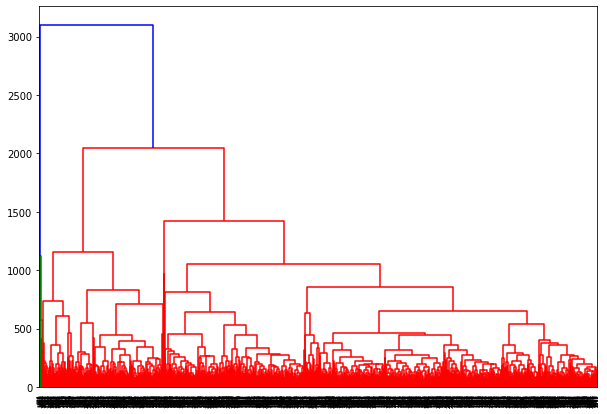

In [4]:
# Complete linked: complete linkage uses the maximum distances between all observations of the two sets.

comp_linked = linkage(df, 'complete')

plt.figure(figsize=(10, 7))
dendrogram(comp_linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

In [ ]:
comp_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
comp_cluster.fit_predict(df)

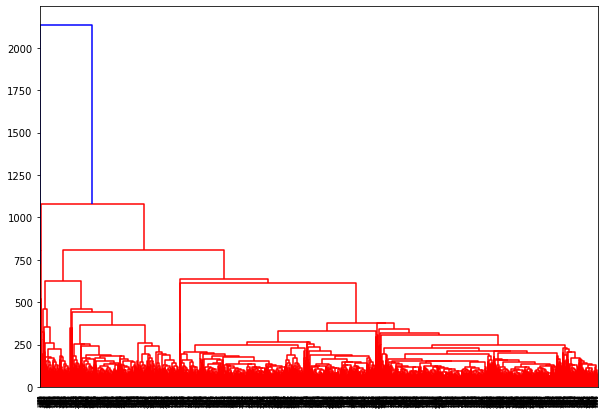

In [9]:
# single uses the minimum of the distances between all observations of the two sets.

avg_linked = linkage(df, 'average')

plt.figure(figsize=(10, 7))
dendrogram(avg_linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

In [ ]:
avg_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
avg_cluster.fit_predict(df)

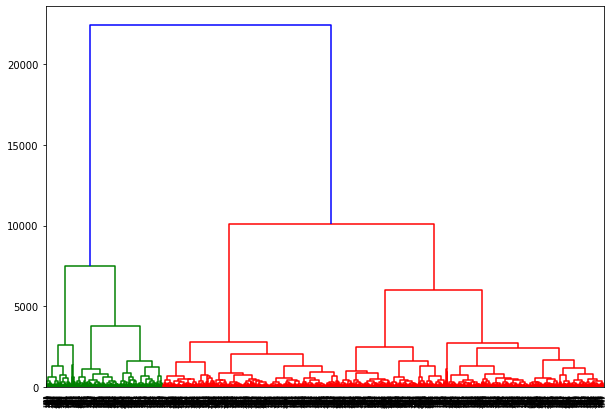

In [6]:
# ward minimizes the variance of the clusters being merged.

ward_linked = linkage(df, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(ward_linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

In [7]:
ward_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
ward_cluster.fit_predict(df)

array([0, 2, 0, ..., 3, 1, 2])